In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pyndamics3 import Simulation

pyndamics3  version  0.0.29


Text(0, 0.5, 'Height [cm]')

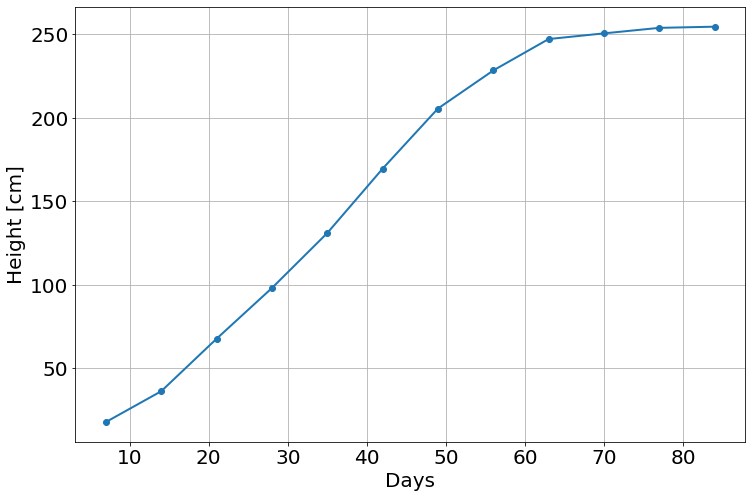

In [3]:

t=array([7,14,21,28,35,42,49,56,63,70,77,84],float)
h=array([17.93,36.36,67.76,98.10,131,169.5,205.5,228.3,247.1,250.5,253.8,254.5])

plot(t,h,'-o')
xlabel('Days')
ylabel('Height [cm]')


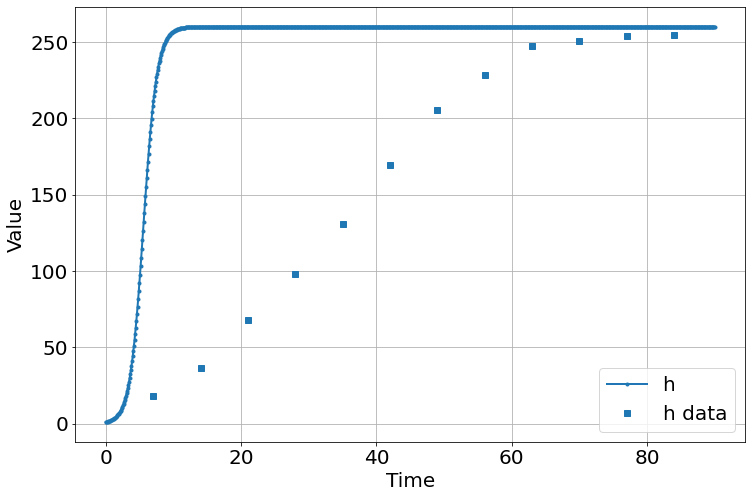

<Figure size 864x576 with 0 Axes>

In [4]:
sim=Simulation()
sim.add("h' = a*h*(1-h/K)",1,plot=True)
sim.params(a= 1 , K= 260 )
sim.add_data(t=t,h=h,plot=True)
sim.run(90)

In [5]:
from pyndamics3.mcmc import *

In [7]:
model=MCMCModel(sim,
               a=Uniform(0,1),  # prior probability
                K=Uniform(50,400),
               )

Sampling Prior...
Done.
0.34 s
Running MCMC 1/3...
Done.
25.85 s
Running MCMC 2/3...
Done.
27.99 s
Running MCMC 3/3...
Done.
27.87 s


<Figure size 864x576 with 0 Axes>

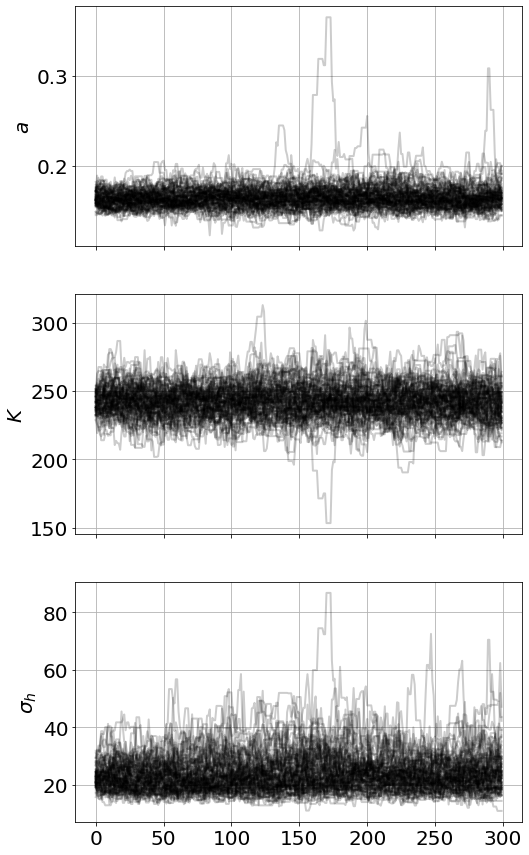

In [8]:
model.run_mcmc(300,repeat=3)
model.plot_chains()

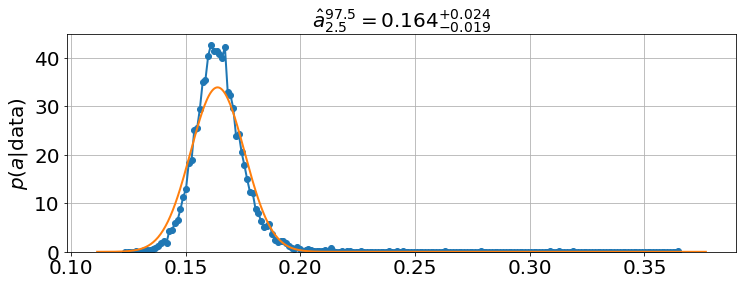

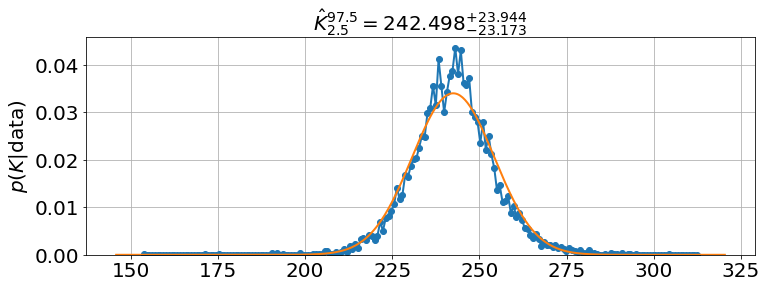

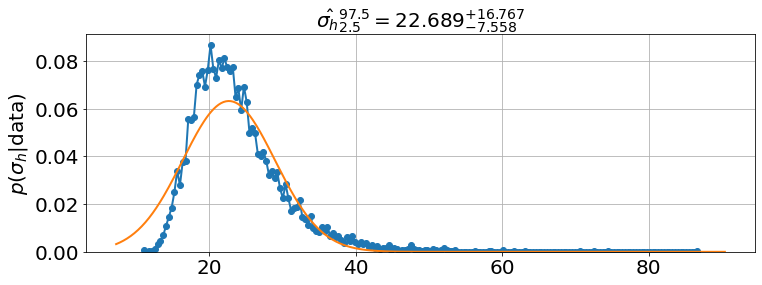

In [9]:
model.plot_distributions()

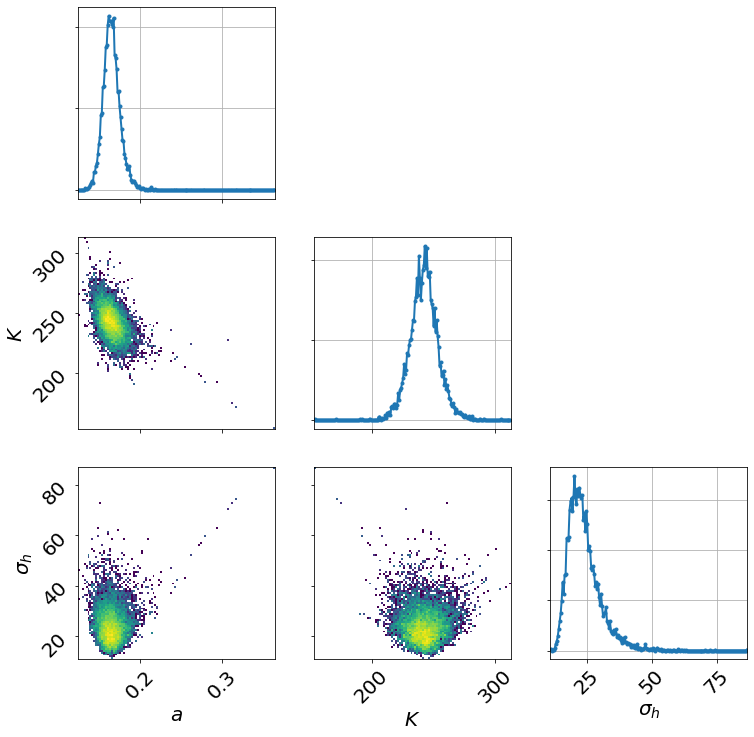

In [10]:
model.triangle_plot()

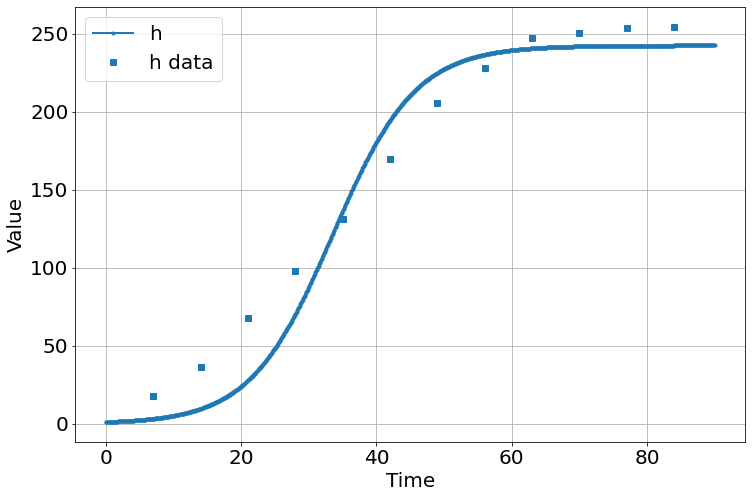

<Figure size 864x576 with 0 Axes>

In [11]:
sim.run(90)